<a href="https://colab.research.google.com/github/Anushil007/Data-Science-Projects/blob/master/Apple_Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project by Anushil Timsina and Manjil Karki

In [ ]:
# Import libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import r2_score

# ! pip install --upgrade pandas-datareader

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL',data_source='yahoo',start='2014-01-01',end = '2022-03-05')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.494320
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.110041
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.203342
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.080309
2014-01-08,19.484285,19.238930,19.243214,19.409286,258529600.0,17.188478
...,...,...,...,...,...,...
2022-02-28,165.419998,162.429993,163.059998,165.119995,94869100.0,165.119995
2022-03-01,166.600006,161.970001,164.699997,163.199997,83474400.0,163.199997
2022-03-02,167.360001,162.949997,164.389999,166.559998,79724800.0,166.559998


In [ ]:
# Get the no of rows and columns
df.shape

(2058, 6)

In [ ]:
df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0, 0.5, 'Closing Price in USD')

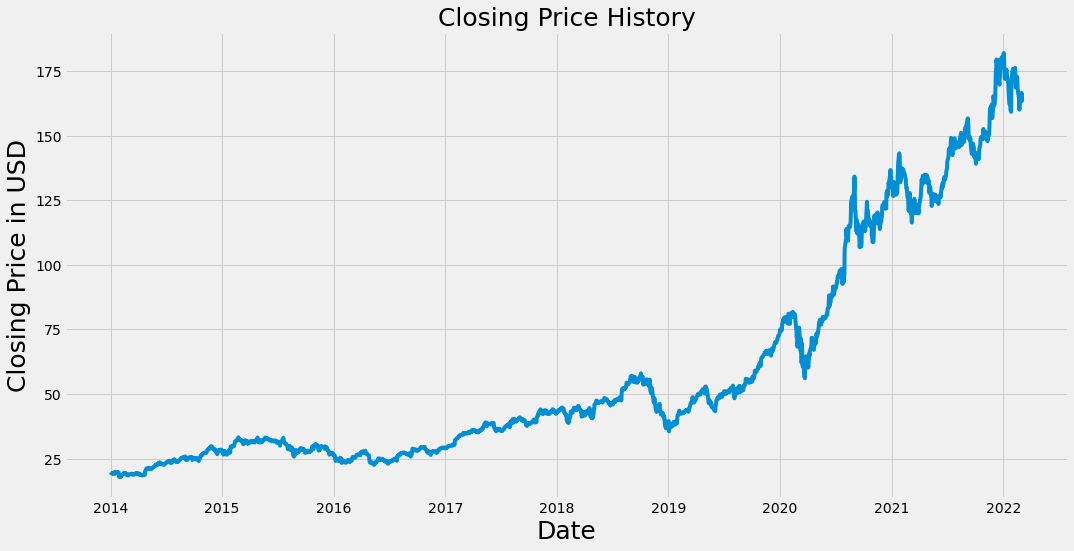

In [ ]:
# Visualise  the closing price

plt.figure(figsize=(16,8))
plt.title('Closing Price History',fontsize = 25)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 25)
plt.ylabel('Closing Price in USD',fontsize = 25)

In [ ]:
# df with only close column

data = df.filter(['Close'])

# Convert dataframe into numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1647

In [ ]:
dataset.max()

182.00999450683594

In [ ]:
# Scale the data
# NOrmalize the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01160666],
       [0.00896335],
       [0.00960514],
       ...,
       [0.90588493],
       [0.90387469],
       [0.88523444]])

In [ ]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len,:]

# Split the data into x_train and y_train data sets
x_train = []  # -> training variables 
y_train = []  # -> target variables

# for 60 data

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01160666, 0.00896335, 0.00960514, 0.00875885, 0.00950289,
       0.00799304, 0.00721419, 0.00782118, 0.01014033, 0.01252693,
       0.01185033, 0.0088959 , 0.01072339, 0.01125423, 0.01227021,
       0.01007071, 0.01103448, 0.00146199, 0.00021103, 0.        ,
       0.00017839, 0.00038072, 0.00196018, 0.00278691, 0.0027695 ,
       0.00432938, 0.00635484, 0.00787122, 0.0078625 , 0.00971392,
       0.00961818, 0.01005331, 0.00817797, 0.00682476, 0.00554117,
       0.00604155, 0.00484717, 0.00382248, 0.00606767, 0.00575656,
       0.00608725, 0.00684434, 0.00708801, 0.00673774, 0.0066703 ,
       0.00677473, 0.00789949, 0.00801262, 0.00671599, 0.00541935,
       0.00586534, 0.00687915, 0.0068487 , 0.00629175, 0.00719896,
       0.00857392, 0.00983575, 0.00870228, 0.00819754, 0.00806701])]
[0.00804091068532381]

[array([0.01160666, 0.00896335, 0.00960514, 0.00875885, 0.00950289,
       0.00799304, 0.00721419, 0.00782118, 0.01014033, 0.01252693,
       0.01185033, 0.0088959 , 0.01

In [ ]:
# Convert x_train and y_train to numpy array

x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1587, 60, 1)

In [ ]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1587/1587 [==============================] - 44s 26ms/step - loss: 3.8163e-04
Epoch 2/10
1587/1587 [==============================] - 41s 26ms/step - loss: 1.8658e-04
Epoch 3/10
1587/1587 [==============================] - 41s 26ms/step - loss: 1.2270e-04
Epoch 4/10
1587/1587 [==============================] - 41s 26ms/step - loss: 1.2993e-04
Epoch 5/10
1587/1587 [==============================] - 42s 27ms/step - loss: 9.1666e-05
Epoch 6/10
1587/1587 [==============================] - 41s 26ms/step - loss: 1.0083e-04
Epoch 7/10
1587/1587 [==============================] - 41s 26ms/step - loss: 8.7568e-05
Epoch 8/10
1587/1587 [==============================] - 41s 26ms/step - loss: 8.7715e-05
Epoch 9/10
1587/1587 [==============================] - 41s 26ms/step - loss: 7.5140e-05
Epoch 10/10
1587/1587 [==============================] - 41s 26ms/step - loss: 8.0230e-05


In [ ]:
# Create the testing dataset
# Create a new array containing values from 1543 to 2003

test_data = scaled_data[training_data_len-60:,:]

# Create the datasets x_test and y_test

x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
# Convert the data into numoy array

x_test = np.array(x_test)

In [ ]:
# Reshape the data -> LSTM requires 3D data

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the models predicted price value
# predictions should contain same values as y_train for max accuracy

predictions = model.predict(x_test)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean square error

rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [ ]:
rmse

4.493162002006587

In [ ]:
# Plot the data
train = data[:training_data_len]

valid = data[training_data_len:]

valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
r2 = r2_score(valid['Close'],valid['Predictions'])
r2

0.9256351002000823

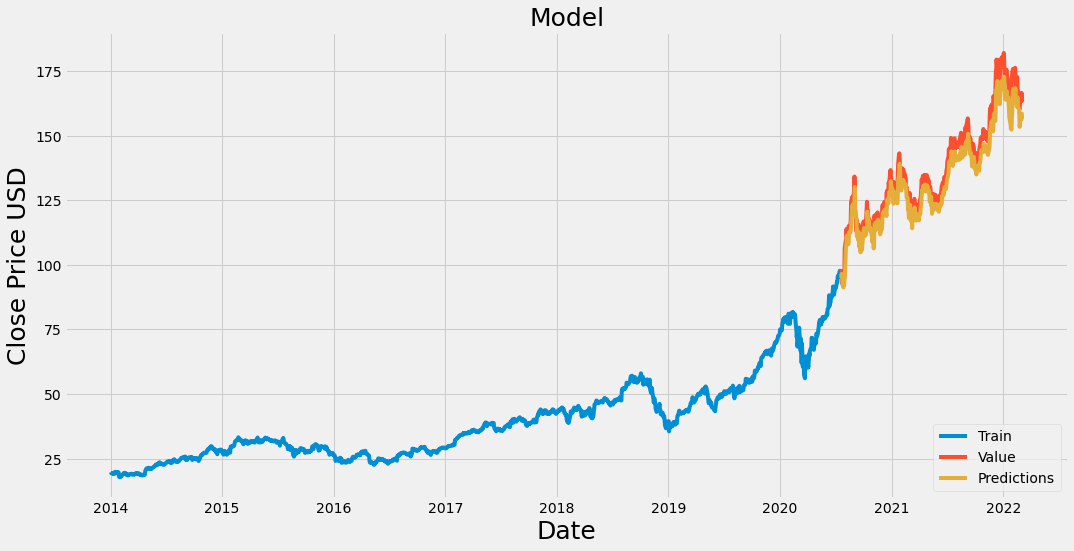

In [ ]:
# Visualise

plt.figure(figsize = (16,8))
plt.title('Model',fontsize = 25)
plt.xlabel('Date',fontsize = 25)
plt.ylabel('Close Price USD',fontsize = 25)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'],loc = 'lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2020-07-20,98.357498,94.910057
2020-07-21,97.000000,96.495354
2020-07-22,97.272499,95.726997
2020-07-23,92.845001,95.726059
2020-07-24,92.614998,92.164055
...,...,...
2022-02-28,165.119995,157.287933
2022-03-01,163.199997,157.912170
2022-03-02,166.559998,156.396072


In [ ]:
# Get the quote

apple_quote = web.DataReader('AAPL',data_source='yahoo',start = '2014-01-01',end = '2022-03-03')

# Create a new dataframe

new_df = apple_quote.filter(['Close'])

# Fet the last 60 day closing price values and convert the df to an array
last_60_days = new_df[-60:].values

# Scale the data betwn values 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the last 60 days

X_test.append(last_60_days_scaled)

#Convert thr X-test data set to numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[159.15833]]


In [ ]:
# Get the price
apple_quote_pred = web.DataReader('AAPL',data_source='yahoo',start = '2022-03-04',end = '2022-03-04')
print(apple_quote_pred)


                  High         Low        Open       Close    Volume  \
Date                                                                   
2022-03-04  165.550003  162.110001  164.490005  163.169998  83819592   

             Adj Close  
Date                    
2022-03-04  163.169998  
